D207 - Exploratory Data Analysis
Vera Lake

# A.  Describe a real-world organizational situation or issue in the Data Dictionary you chose, by doing the following:

1.  Provide one question that is relevant to your chosen data set. You will answer this question later in the task through an analysis of the cleaned data, using one of the following techniques: chi-square, t-test, or analysis of variance (ANOVA).

        What factors influence customer churn?

2.  Explain how stakeholders in the organization could benefit from an analysis of the data.

        Stakeholders in the organization could benefit from an analysis of the data because if it is known what causes customers to stay or leave the company can base decisions on how to increase their retention rate and therefore their profit.

3.  Identify all of the data in your data set that are relevant to answering your question in part A1.
        "Churn" column - outcome variable - categorical 1/0 yes/no
        Features that have a strong correlation with Churn (as discovered in the data cleaning process were): Tenure, StreamingMovies, StreamingTV, MonthlyCharge_z, and Bandwidth_GB_Year_z. These features will therefore be used in answering the question of "What factors might influence customer churn?".
        Churn - outcome - categorical - 1/0 yes/no (whether the customer is deemed lost)
        Tenure - continuous - numeric - (how long a customer has been with the company)
        StreamingMovies - categorical - 1/0 yes/no (whether the customer streams movies)
        StreamingTV - categorical - 1/0 yes/no (whether the customer streams TV)
        MonthlyCharge_z - continuous - numeric (how much the customer pays each month)
        Bandwidth_GB_Year_z - continuous - numeric - (how much bandwidth the customer uses each month)

# B.  Describe the data analysis by doing the following:

1.  Using one of the following techniques, write code (in either Python or R) to run the analysis of the data set:

    •   chi-square

    •   t-test

    •   ANOVA

2.  Provide the output and the results of any calculations from the analysis you performed.
See output cells below.

3.  Justify why you chose this analysis technique.<br>
I chose Chi-squared because it is the test that works best when working with two categorical variables. 

### Standard Imports

In [1]:
# Standard data science imports
import numpy as np
import pandas as pd
from pandas import DataFrame

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistics packages
import pylab
import statsmodels.api as sm
import statistics
from scipy import stats

# Import chisquare from SciPy.stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [2]:
# Load data set into Pandas dataframe
df = pd.read_csv('df_cleaned.csv')
df.describe()

,Unnamed: 0,Zip,Population,Children,Age,Income,Churn,Outage_sec_perweek,Email_Count,Contacted_Count,...,Age_z,Education_Numeric_z,Income_z,Outage_sec_perweek_z,Yearly_equip_failure_z,Tenure_z,MonthlyCharge_z,Bandwidth_GB_Year_z,Contract_Numeric_z,InternetService_Numeric_z
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,4999.50000,49153.319600,9756.562400,1.822500,53.207500,38256.017897,0.265000,11.452955,12.016000,0.994200,...,-3.312017e-16,-1.219136e-16,1.287470e-16,1.583927e-16,-5.953460e-16,8.298828e-15,7.865486e-16,7.711165e-16,6.078693e-16,1.168177e-16
std,2886.89568,27532.196108,14432.698671,1.925971,18.003457,24747.872761,0.441355,7.025921,3.025898,0.988466,...,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,0.00000,601.000000,0.000000,0.000000,18.000000,740.660000,0.000000,-1.348571,1.000000,0.000000,...,-1.955694e+00,-4.062057e+00,-1.515978e+00,-1.822134e+00,-6.258635e-01,-1.336558e+00,-2.228565e+00,-1.564043e+00,-8.356088e-01,-1.582890e+00
25%,2499.75000,26292.500000,738.000000,1.000000,41.000000,23660.790000,0.000000,8.054362,10.000000,0.000000,...,-6.780981e-01,-3.318629e-01,-5.897864e-01,-4.837463e-01,-6.258635e-01,-1.030776e+00,-7.616596e-01,-1.005993e+00,-8.356088e-01,-2.937867e-01
50%,4999.50000,48869.500000,2910.500000,1.000000,53.000000,33186.785000,0.000000,10.202896,12.000000,1.000000,...,-1.152614e-02,-2.101343e-02,-2.048453e-01,-1.779299e-01,-6.258635e-01,6.112274e-02,-9.602095e-02,-7.112946e-03,-8.356088e-01,-2.937867e-01
75%,7499.25000,71866.500000,13168.000000,3.000000,65.000000,45504.192500,1.000000,12.487644,14.000000,2.000000,...,6.550459e-01,9.115351e-01,2.928954e-01,1.472747e-01,9.466579e-01,1.012512e+00,6.854113e-01,9.983128e-01,3.605103e-01,9.953168e-01
max,9999.00000,99929.000000,111850.000000,10.000000,89.000000,258900.700000,1.000000,47.049280,23.000000,7.000000,...,1.988190e+00,4.020030e+00,8.916149e+00,5.066682e+00,8.809265e+00,1.482927e+00,3.272363e+00,1.815009e+00,1.556629e+00,9.953168e-01


In [3]:
# The intent here is to help determine whether one variable is contingent upon or depends upon the other variable. 
# For example, does a customer who churns depend on whether they stream tv to their devices or are they independent?
# Resource: "https://machinelearningmastery.com/chi-squared-test-for-machine-learning/"
table = pd.crosstab(df['Churn'], df['StreamingTV'])
table

StreamingTV,0,1
Churn,,
0,4235,3115
1,836,1814


In [4]:
# contingency table
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print('expected \n', expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=1
expected 
 [[3727.185 3622.815]
 [1343.815 1306.185]]
probability=0.950, critical=3.841, stat=528.652
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


### C. Identify the distribution of two continuous variables and two categorical variables using univariate statistics from your cleaned and prepared data. 

Represent your findings in Part C, visually as part of your submission.

Text(0.5, 1.0, 'Distribution of Bandwidth GB / Year')

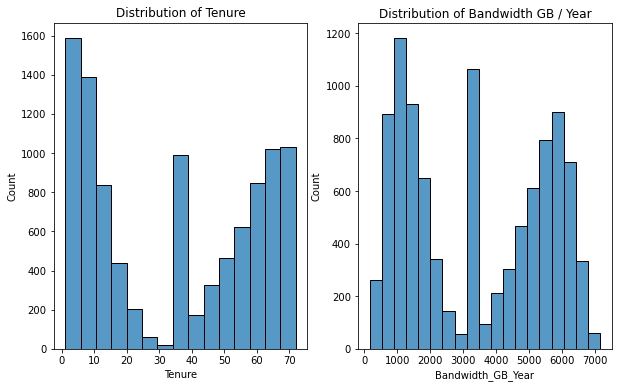

In [5]:
fig, axs = plt.subplots(ncols=2, figsize=(10,6))
sns.histplot(df.Tenure, ax=axs[0]).set_title("Distribution of Tenure")
sns.histplot(df.Bandwidth_GB_Year, ax=axs[1]).set_title("Distribution of Bandwidth GB / Year")

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

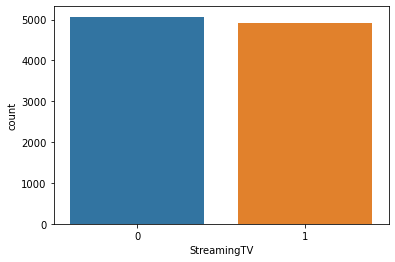

In [6]:
# Create histograms of categorical data
# df[['StreamingTV', 'StreamingMovies']].hist()
sns.countplot(x="StreamingTV", data=df)

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

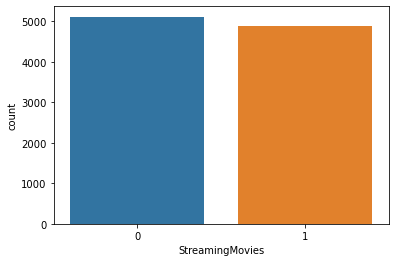

In [7]:
sns.countplot(x="StreamingMovies", data=df)

# D.  Identify the distribution of two continuous variables and two categorical variables using bivariate statistics from your cleaned and prepared data.

Represent your findings in Part D, visually as part of your submission.

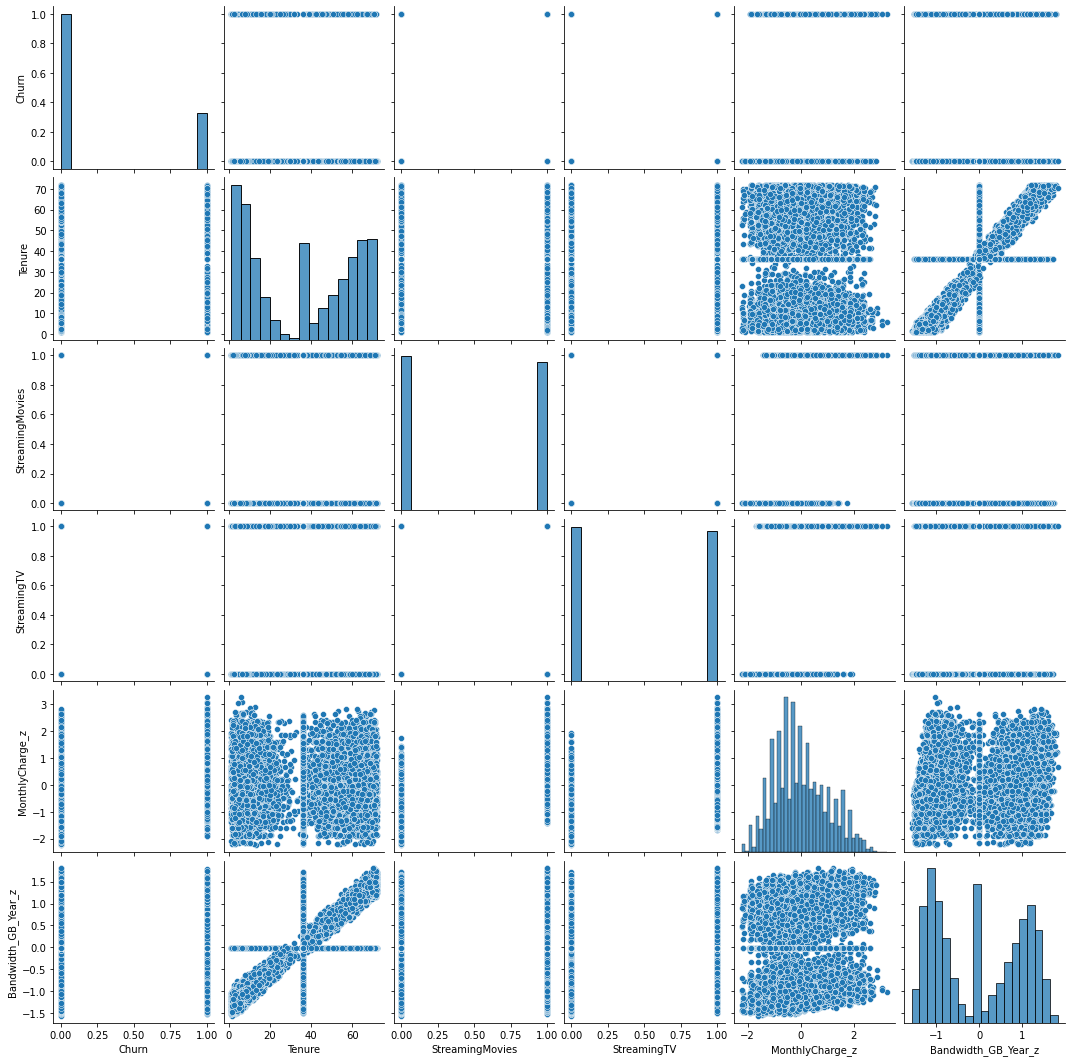

In [8]:
# Citation: Waskom, M., Botvinnik, Olga, Kane, Drew, Hobson,Paul, Lukauskas, Saulius, Gemperline, David C, Qalieh, 
# Adel. (2017).
distibution_df = df[['Churn', 'Tenure', 'StreamingMovies', 'StreamingTV', 'MonthlyCharge_z', 'Bandwidth_GB_Year_z']]
sns.pairplot(distibution_df)

<AxesSubplot:xlabel='Tenure', ylabel='Churn'>

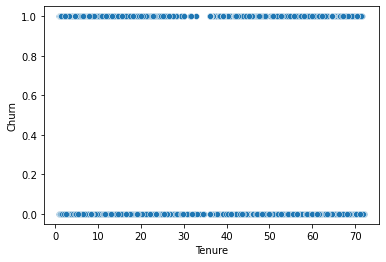

In [9]:
sns.scatterplot(data=df, x="Tenure", y="Churn")

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Churn'>

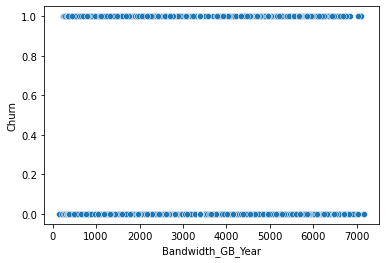

In [10]:
sns.scatterplot(data=df, x="Bandwidth_GB_Year", y="Churn")

<AxesSubplot:xlabel='Tenure', ylabel='Bandwidth_GB_Year'>

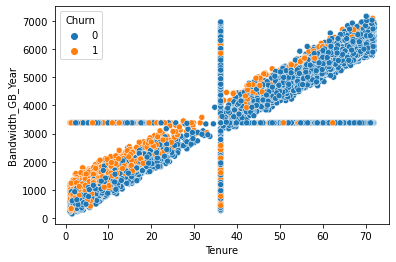

In [11]:
sns.scatterplot(data=df, x="Tenure", y="Bandwidth_GB_Year", hue="Churn")

<AxesSubplot:xlabel='Churn', ylabel='StreamingTV'>

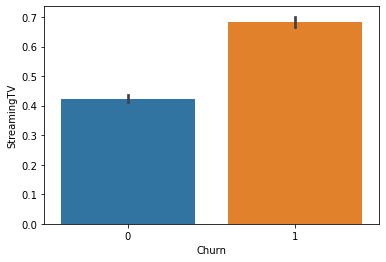

In [12]:
sns.barplot(x='Churn',y='StreamingTV',data=df) 

<AxesSubplot:xlabel='Churn', ylabel='StreamingMovies'>

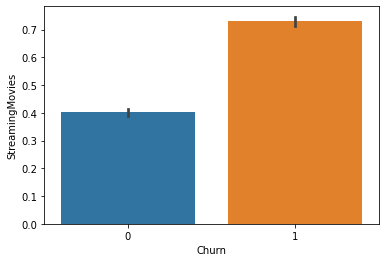

In [13]:
sns.barplot(x='Churn',y='StreamingMovies',data=df)

# E.  Summarize the implications of your data analysis by doing the following:

1.  Discuss the results of the hypothesis test.\
The null hypothesis is ruled rejected for both the test statistic and the interpreted p-value. This rules that Churn is dependent on whether a customer is streaming TV. Based on our contingency table customers who do not stream TV have a higher probability to not churn. 

2.  Discuss the limitations of your data analysis.\
The limitations of the data-cleaning process are that I have no access to stakeholders to shed light on whether the to keep or drop outliers based on more information provided by the stakeholders. 

3.  Recommend a course of action based on your results.\
Based on the results the recommended course of action is to find ways to get customers to increase their monthly average bandwidth usage. Customers with more bandwidth usage have a higher tenure and therefore a lower churn rate.  


# F.  Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the tool(s) used. 

Link to video: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=204dcc88-4111-4e49-9604-ae3700efea69

# G.  Reference the web sources used to acquire segments of third-party code to support the analysis. 

1. Brownlee, Jason. “A Gentle Introduction to the Chi-Squared Test for Machine Learning” machinelearningmastery, June 2018, https://machinelearningmastery.com/chi-squared-test-for-machine-learning/.
2. Martin, G., Global Health with Greg Martin. (2019, June 10). Statistics made easy ! ! ! Learn about the t-test, the chi square test, the p value and more. YouTube. https://www.youtube.com/watch?v=I10q6fjPxJ0
3. Waskom, M., Botvinnik, Olga, Kane, Drew, Hobson,Paul, Lukauskas, Saulius, Gemperline, David C, Qalieh,                 Adel. (2017). mwaskom/seaborn: v0.8.1 (September 2017). Zenodo. https://seaborn.pydata.org/generated/seaborn.distplot.html


In [14]:
# H.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.
 
# I.   Demonstrate professional communication in the content and presentation of your submission.